## Pre-trained model and its uses

#### Import necessary Libraries

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np


In [2]:
# Model initialization with ImageNet weights
model = ResNet50(weights='imagenet')

# For InceptionV3
# from tensorflow.keras.applications import inception_v3
# inception_model = inception_v3.InceptionV3(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 235s 2us/step


In [4]:

model.summary() 

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [5]:
# import the image
img_path = 'elephant.jpeg'

In [6]:
# Load the image in img variable with target size of 224x224
img = image.load_img(img_path, target_size=(224, 224))

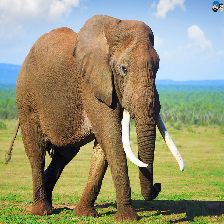

In [7]:
img

In [8]:
img_array = image.img_to_array(img) # convert image to numpy array

In [10]:
img_array.shape

(224, 224, 3)

In [11]:
img_tensor = np.expand_dims(img_array, axis=0) # add a dimension to transform the array into a batch of size (1, 224, 224, 3)

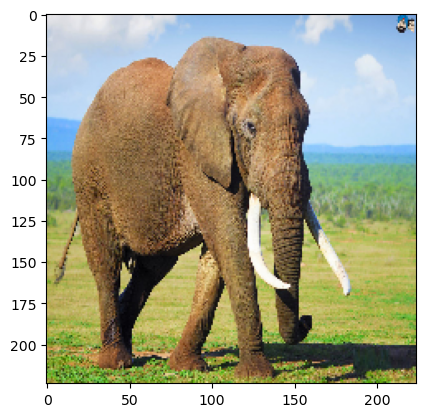

In [12]:
import matplotlib.pyplot as plt
plt.imshow(np.uint8(img_tensor[0])) # display the preprocessed image

In [13]:
x = preprocess_input(img_tensor) # preprocess the image

In [16]:
x

array([[[[ 1.2206100e+02,  1.0722100e+02,  1.0032000e+02],
         [ 1.2506100e+02,  1.1022100e+02,  1.0332000e+02],
         [ 1.2806100e+02,  1.1522100e+02,  1.0832000e+02],
         ...,
         [ 1.1306100e+02,  4.2221001e+01, -6.6800003e+00],
         [ 1.1306100e+02,  4.2221001e+01, -6.6800003e+00],
         [ 1.1306100e+02,  4.2221001e+01, -6.6800003e+00]],

        [[ 1.2406100e+02,  1.0922100e+02,  1.0232000e+02],
         [ 1.2906100e+02,  1.1422100e+02,  1.0732000e+02],
         [ 1.3006100e+02,  1.1522100e+02,  1.0832000e+02],
         ...,
         [ 1.1406100e+02,  4.3221001e+01, -5.6800003e+00],
         [ 1.1506100e+02,  4.4221001e+01, -4.6800003e+00],
         [ 1.1506100e+02,  4.4221001e+01, -4.6800003e+00]],

        [[ 1.2606100e+02,  1.0822100e+02,  1.0232000e+02],
         [ 1.2906100e+02,  1.1122100e+02,  1.0532000e+02],
         [ 1.2806100e+02,  1.1322100e+02,  1.0632000e+02],
         ...,
         [ 1.1506100e+02,  4.7221001e+01, -2.6800003e+00],
         [

In [14]:

preds = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


In [15]:
preds.shape

(1, 1000)

In [17]:
from tensorflow.keras.applications.resnet50 import decode_predictions as dpred # decode the results into a list of tuples (class, description, probability)

In [18]:
dpred(preds, top=3)[0]

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step


[('n01871265', 'tusker', 0.720895),
 ('n02504458', 'African_elephant', 0.25094548),
 ('n02504013', 'Indian_elephant', 0.027468825)]

#### Feature Extraction From Pretrained Model

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [20]:
model = VGG16(weights='imagenet', include_top=False)

img_path = 'elephant.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


In [21]:

print(features)

[[[[ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   ...
   [ 0.         0.         1.2912731 ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]]

  [[ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [67.89218    0.        10.603036  ... 25.100304   0.
     0.       ]
   ...
   [23.349167   0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]]

  [[ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.  